In [244]:
#必要なライブラリをインポートしておく
import numpy as np
import numba
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.optimize
import time
%matplotlib inline

In [245]:
#物理定数
g = 9.81

#分割数・断面間距離[m]
imax = 101
xmax = 5000
chlen = 5000
dx = xmax/(imax-1)

#勾配・川幅
slope0 = 1/1000
w0 = 200.
n0 = 0.02

#流量[m3/s]
q_up = 2000.

#時間
tuk   = 600.
etime = tuk*6.
dt = 0.2

In [246]:
h = np.zeros(imax+1)
u = np.zeros(imax+1)
q = np.zeros(imax+1)
z0 = np.zeros(imax+1)
wu = np.zeros(imax+1)
q = np.zeros(imax+1)
wl = np.zeros(imax+1)
nh = np.zeros(imax+1)
h_bar= np.zeros(imax+1)
pressure = np.zeros(imax+1)
roughness= np.zeros(imax+1)
advection= np.zeros(imax+1)

In [247]:
x = np.linspace(0,xmax + dx, imax+1)

In [248]:
#河床高
z0 = - slope0 * x

n1 = int(0.4*imax)
n2 = int(0.5*imax)

z0[n1:n2] = z0[n1:n2]+0.1

In [249]:
h0 = (n0*q_up/(w0*slope0**0.5))**(2/3)

In [250]:
h[1:]  = h0
u[1:]  = q_up/(h0*w0)
q[1:]  = q_up/w0

In [251]:
#下流端水位設定
h[0]  = h0
u[0]  = q_up/(h[0]*w0)
q[0]  = q_up/w0

In [252]:
t = 0.
optime = 0.
n = 0

start time :  1594347076.1458073
[3.41995189 3.41995189 3.41995189 3.41995189 3.41995189 3.41995189
 3.41995189 3.41995189 3.41995189 3.41995189 3.41995189 3.41995189
 3.41995189 3.41995189 3.41995189 3.41995189 3.41995189 3.41995189
 3.41995189 3.41995189 3.41995189 3.41995189 3.41995189 3.41995189
 3.41995189 3.41995189 3.41995189 3.41995189 3.41995189 3.41995189
 3.41995189 3.41995189 3.41995189 3.41995189 3.41995189 3.41995189
 3.41995189 3.41995189 3.41995189 3.41995189 3.41995189 3.41995189
 3.41995189 3.41995189 3.41995189 3.41995189 3.41995189 3.41995189
 3.41995189 3.41995189 3.41995189 3.41995189 3.41995189 3.41995189
 3.41995189 3.41995189 3.41995189 3.41995189 3.41995189 3.41995189
 3.41995189 3.41995189 3.41995189 3.41995189 3.41995189 3.41995189
 3.41995189 3.41995189 3.41995189 3.41995189 3.41995189 3.41995189
 3.41995189 3.41995189 3.41995189 3.41995189 3.41995189 3.41995189
 3.41995189 3.41995189 3.41995189 3.41995189 3.41995189 3.41995189
 3.41995189 3.41995189 3.4199

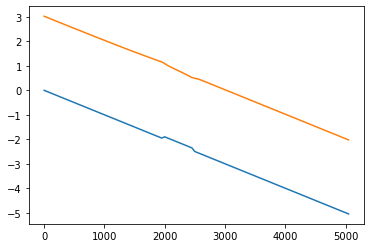

In [253]:
t0 = time.time()
print("start time : ", str(t0))   

print (h)

while t<etime:
    
    h[0]  = h[1]
    u[0]  = q_up/(h[0]*w0)
    q[0]  = q_up/w0
    
    h_bar[1:imax] = (h[1:imax]+h[2:imax+1])*0.5
    pressure[1:imax] = -g*(-h[1:imax]+h[2:imax+1])/dx -g*(-z0[1:imax]+z0[2:imax+1])/dx
    roughness[1:imax] = g*n0**2.0*u[1:imax]/h_bar[1:imax]**(4.0/3.0)
    advection[1:imax] = u[1:imax]*(-u[0:imax-1]+u[1:imax])/dx
    wu[1:imax] = (u[1:imax]+(-advection[1:imax]+pressure[1:imax])*dt)/(1.0+roughness[1:imax]*dt)
    q[1:imax] = wu[1:imax]*h_bar[1:imax]
    
    wu[imax] = wu[imax-1]
    q[imax] = q[imax-1]
    
    nh[1:imax] = h[1:imax]-(-q[0:imax-1]+q[1:imax])/dx*dt
    
    #print(nh[3])
    
    h[1:imax] = nh[1:imax]
    h[imax] = h[imax-1]
    u = wu
    wl = h + z0

    if optime>tuk:
        print("Time= ",t/3600)
        optime = optime-tuk
        print(h)
    
    optime+=dt
    t+=dt
    
#print(h_bar[1],h[1],h[2])
#h1 = (h[1]+h[2])*0.5
#print(h1)

print (wl)

plt.plot(x,z0)
plt.plot(x,wl)

t1 = time.time()
print("End time : ", str(t1))
print("Elapsed : ", str(t1 - t0))